In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.arff


# *importing required libraries*

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_excel("/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [6]:
X=df.drop(['Class'], axis=1)
Y=df['Class']

class_values=df["Class"].unique()
class_valsum=df["Class"].nunique()


In [7]:
le = LabelEncoder()
Y = df['Class']
Y = le.fit_transform(Y)

# ***splitting dataset into train and test***

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# *stochastic gradient descent (SGD)*

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann_sgd = Sequential()
ann_sgd.add(Dense(64, input_dim=34, activation='relu')) 
ann_sgd.add(Dense(1, activation='relu'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# *Root mean square propagation (rms)*

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann_rms = Sequential()
ann_rms.add(Dense(64, input_dim=34, activation='relu')) 
ann_rms.add(Dense(1, activation='relu'))

# *adaptive moment estimation (adam)*

In [12]:
ann_adam=Sequential()
ann_adam.add(tf.keras.layers.Dense(units=8,activation="relu")) #1st layer
ann_adam.add(tf.keras.layers.Dense(units=8,activation="relu")) #2nd layer
ann_adam.add(tf.keras.layers.Dense(units=7, activation="softmax")) #output layer

# *training models for three different optimization algorithms*

In [13]:
from tensorflow.keras.optimizers import RMSprop

ann_rms.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
from tensorflow.keras.optimizers import SGD

ann_sgd.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

ann_adam = Sequential()
ann_adam.add(Dense(64, input_dim=34, activation='relu'))  # Adjust input_dim as needed
ann_adam.add(Dense(32, activation='relu'))
ann_adam.add(Dense(1, activation='sigmoid'))

In [16]:
from tensorflow.keras.optimizers import Adam

ann_adam.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate as needed
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [17]:
Training_progress_sgd=ann_sgd.fit(X_train,Y_train,batch_size=35, epochs =70, validation_data=(X_test, Y_test))

Epoch 1/70


I0000 00:00:1725104617.321704      67 service.cc:145] XLA service 0x782548006ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725104617.321777      67 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725104617.321781      67 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1429 - loss: 47.6090

I0000 00:00:1725104618.091417      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.0985 - loss: 4.6176 - val_accuracy: 0.1111 - val_loss: -31.3418
Epoch 2/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1075 - loss: -37.2955 - val_accuracy: 0.1111 - val_loss: -31.3418
Epoch 3/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1011 - loss: -37.4616 - val_accuracy: 0.1111 - val_loss: -31.3418
Epoch 4/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1143 - loss: -37.0367 - val_accuracy: 0.1111 - val_loss: -31.3418
Epoch 5/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1014 - loss: -36.6047 - val_accuracy: 0.1111 - val_loss: -31.3418
Epoch 6/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0894 - loss: -36.9655 - val_accuracy: 0.1111 - val_loss: -31.3418
Epoch 7/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1126 - loss: -37.5328 - val_accuracy: 0.1111 - val_loss: -31.3418
Epoch 8/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1214 - loss: -35.9077 - val_accuracy: 

In [18]:
Training_progress_rms=ann_rms.fit(X_train,Y_train,batch_size=25, epochs =150, validation_data=(X_test, Y_test))

Epoch 1/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0686 - loss: 33.0736 - val_accuracy: 0.0889 - val_loss: 8.4883
Epoch 2/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0969 - loss: 9.6635 - val_accuracy: 0.1111 - val_loss: -21.3889
Epoch 3/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0923 - loss: -29.3364 - val_accuracy: 0.1111 - val_loss: -30.9002
Epoch 4/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1115 - loss: -35.7358 - val_accuracy: 0.1111 - val_loss: -31.6391
Epoch 5/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1041 - loss: -36.1142 - val_accuracy: 0.1111 - val_loss: -32.0619
Epoch 6/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1240 - loss: -36.6090 - val_accuracy: 0.1111 - val_loss: -31.7610
Epoch 7/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1005 - loss: -36.2887 - val_accuracy: 0.1111 - val_loss: -32.0619
Epoch 8/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1065 - loss: -37.3851 

In [19]:
Training_progress_adam=ann_adam.fit(X_train,Y_train,batch_size=25, epochs =150, validation_data=(X_test, Y_test))

Epoch 1/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.0918 - loss: -1.3134 - val_accuracy: 0.1111 - val_loss: -7.8429
Epoch 2/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1148 - loss: -14.4902 - val_accuracy: 0.1111 - val_loss: -28.3455
Epoch 3/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1239 - loss: -47.7387 - val_accuracy: 0.1111 - val_loss: -84.6022
Epoch 4/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0879 - loss: -142.2149 - val_accuracy: 0.1111 - val_loss: -206.5365
Epoch 5/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1103 - loss: -336.8266 - val_accuracy: 0.1111 - val_loss: -430.1547
Epoch 6/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1107 - loss: -670.5120 - val_accuracy: 0.1111 - val_loss: -799.9454
Epoch 7/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1024 - loss: -1241.7228 - val_accuracy: 0.1111 - val_loss: -1347.7382
Epoch 8/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1047 - lo

In [20]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(808, 34) (808,)
(90, 34) (90,)


# *summaries of three different algo*

In [21]:
ann_rms.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,612 (18.02 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,307 (9.02 KB)

In [22]:
ann_sgd.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307 (9.02 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [23]:
ann_adam.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,061 (51.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,708 (34.02 KB)

# *plotting accuracy plots*

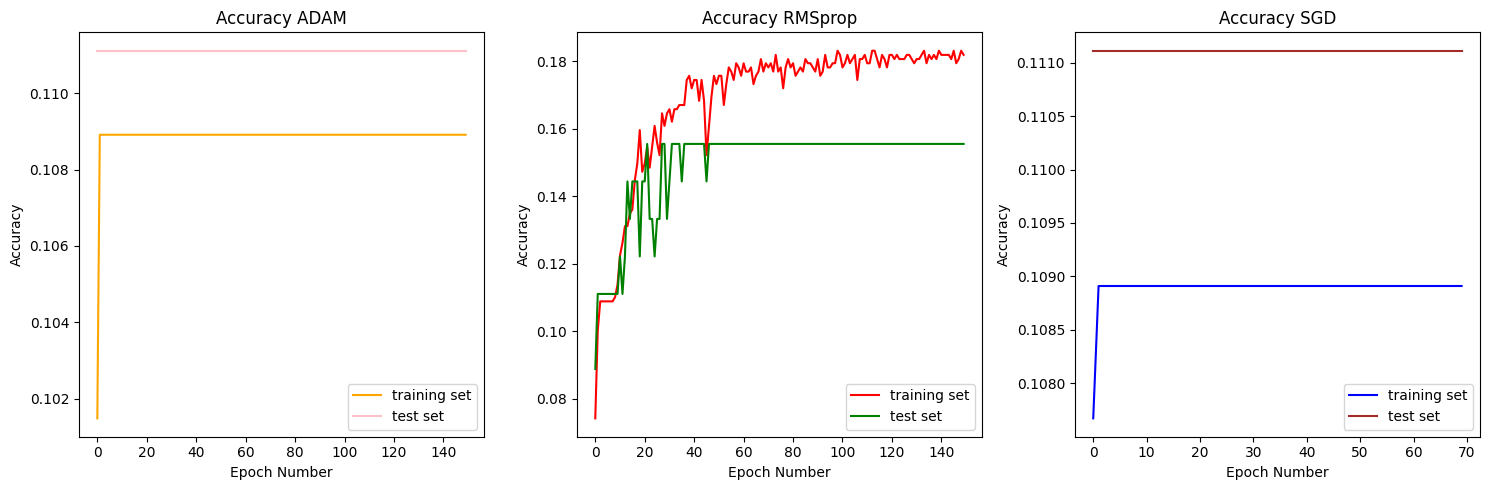

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,5)) 

# Plot for ADAM
axs[0].plot(Training_progress_adam.history['accuracy'], color='orange', label='training set')
axs[0].plot(Training_progress_adam.history['val_accuracy'], color='pink', label='test set')
axs[0].set_title("Accuracy ADAM")
axs[0].set_xlabel('Epoch Number')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot for RMSprop
axs[1].plot(Training_progress_rms.history['accuracy'], color='red', label='training set')
axs[1].plot(Training_progress_rms.history['val_accuracy'], color='green', label='test set')
axs[1].set_title("Accuracy RMSprop")
axs[1].set_xlabel('Epoch Number')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Plot for SGD
axs[2].plot(Training_progress_sgd.history['accuracy'], color='blue', label='training set')
axs[2].plot(Training_progress_sgd.history['val_accuracy'], color='brown', label='test set')
axs[2].set_title("Accuracy SGD")
axs[2].set_xlabel('Epoch Number')
axs[2].set_ylabel('Accuracy')
axs[2].legend()

plt.tight_layout() 
plt.show()


In [25]:
Y_pred_probs = ann.predict(X_test)

# Getting the index of the class with the highest probability for each sample
Y_pred_index = np.argmax(Y_pred_probs, axis=1)

# Decoding the predicted labels back to their original names
Y_pred_names = le.inverse_transform(Y_pred_index)


NameError: name 'ann' is not defined

# *accuracy*

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred_index)
print(f"Accuracy: {accuracy}")

# ***inference and conclusion***

from the given date fruits dataset.. we've tried deploying three different architectures SGD, RMSprop, and ADAM.. there are few other notebooks with ADAM over accuracy of 90% or above but the one i tried is with minimal accuracy of 10-20%.. here are the reasons for it:

1. sparse categorical crossentropy loss for adam matches the input-output dimensions of datas
2. using binary cross entropy loss didn't suit for these optimization algorithms
3. as the number of epochs goes over some 500-600 and above accuracy is kinda becoming above 50% and yet time taking for it is long, for verifying three diff algorithms..
4. among all the 3, ADAM has better accuracy because of its adaptive learning rate and bais correction
5. SGD had the fastest training time
6. relu proved to be best activation function among softmax and sigmoid as the accuracy is better when compared to latter

# conclusion

this was just a implementation trial of different algorithms and exploring different activation function for the chosen dataset.. hence accuracy wasn't given much of a consideration.. if accuracy is important, doing these things could improve it :

1. use SC cross entropy loss for ADAM algo
2. increase dropout size for convolution 
3. trying with more no of epochs (atleast 500+)
4. may be just try playing with diff permutation of activation function, optimization algorithm and no of epochs